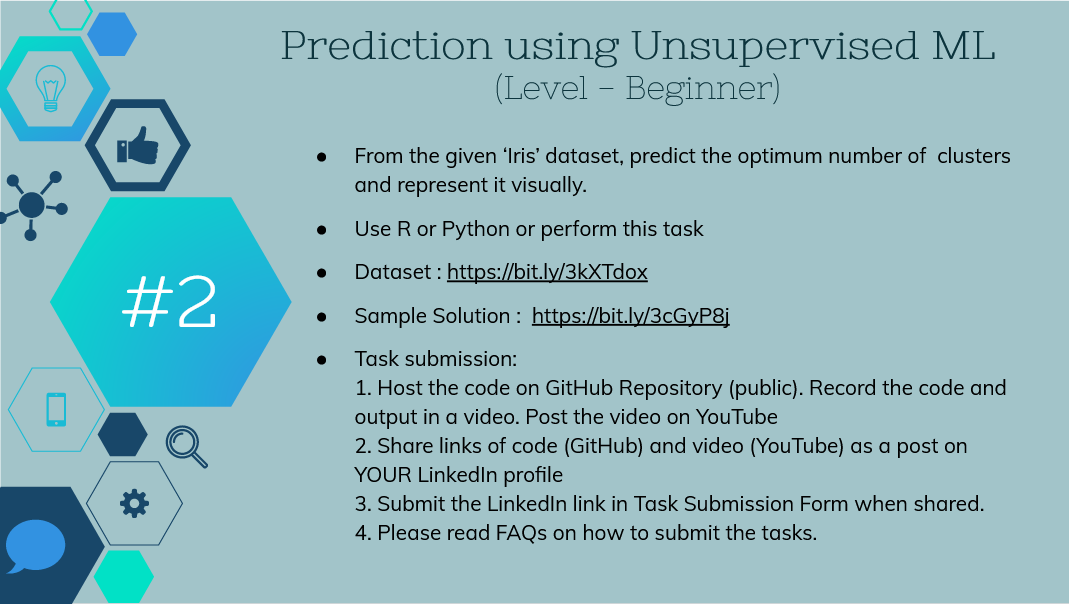

# Done By Sisir Pynda

In [138]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import seaborn as sns

In [139]:
data=pd.read_csv("Iris.csv")
len(data)

150

Lets explore the data ans see how it is and what it is all about???

In [140]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [141]:
data=data.drop(['Id'],axis=1)

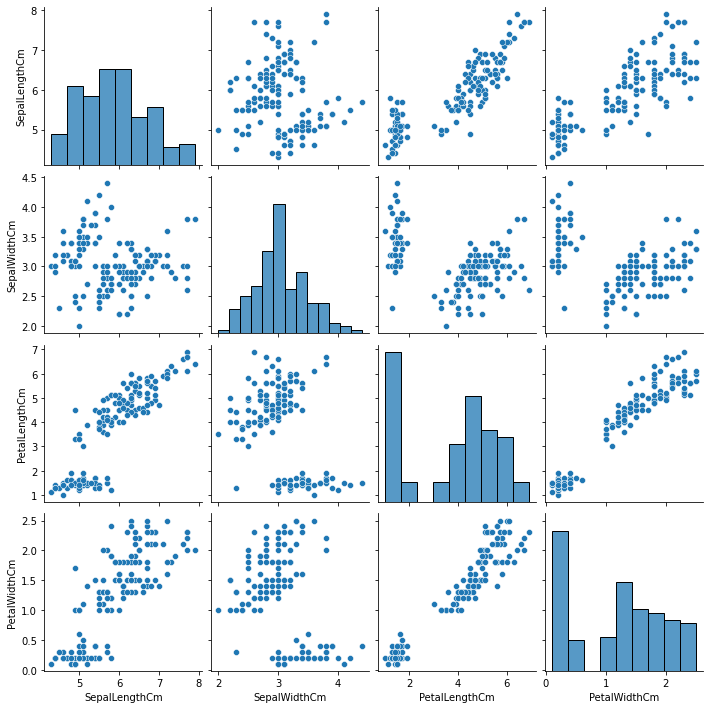

In [142]:
sns.pairplot(data)

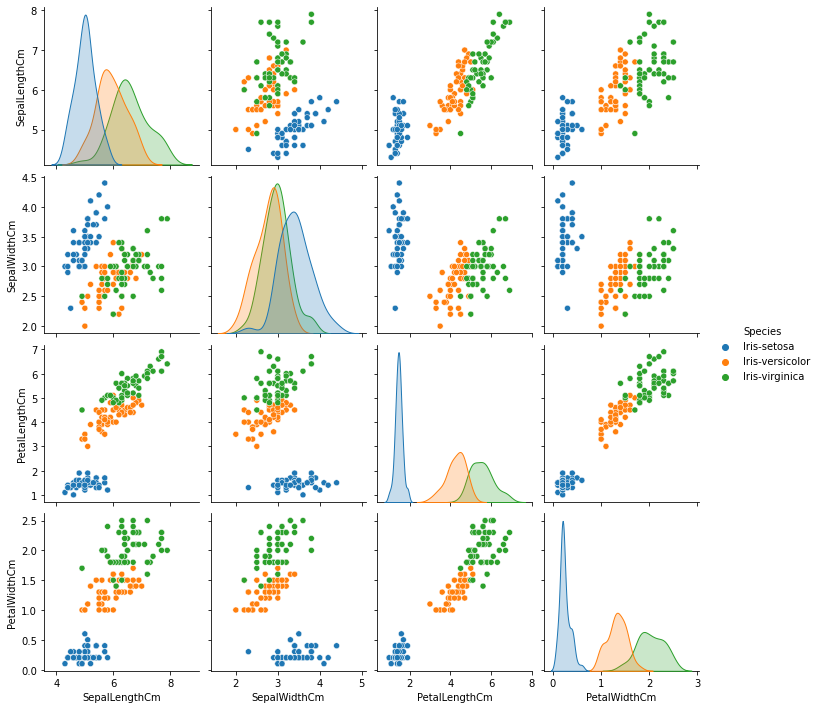

In [143]:
sns.pairplot(data,hue="Species")

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Count'>

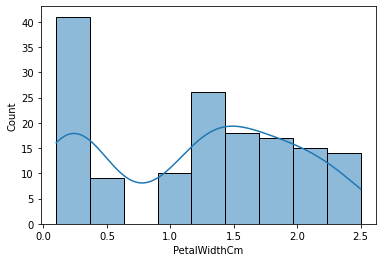

In [144]:
sns.histplot(data['PetalWidthCm'],kde=True) #bins are ranges of values and this histogram tells s how many of the flowers are in each bin

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Density'>

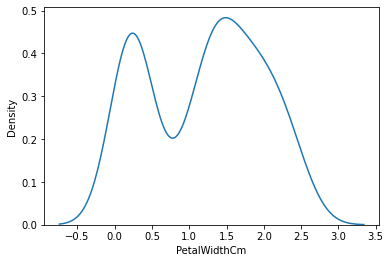

In [145]:
sns.kdeplot(data['PetalWidthCm'])

In [146]:
x = data.iloc[:, [0, 1, 2, 3]].values

In [147]:
x[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [148]:
from sklearn.cluster import KMeans

In [149]:
wcss=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

C:\Users\sisir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


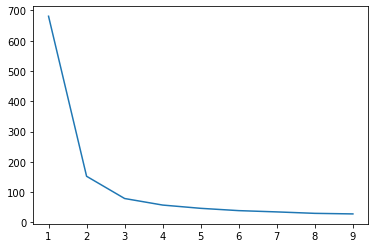

In [150]:
plt.plot(range(1,10),wcss)

using knnee diagram to get number of clusters needed

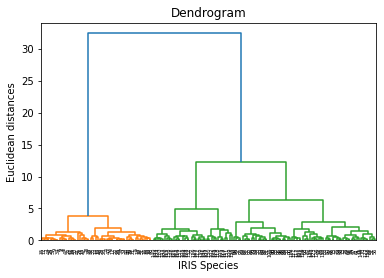

In [151]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('IRIS Species')
plt.ylabel('Euclidean distances')
plt.show()

Using the dendrogram to find the optimal number of clusters

it can be seen that 3 is the knee point for this dataset, so it will have least sum of variances!
also our Dendrogram suggests us the same thing

In [152]:
km = KMeans(n_clusters = 3)

In [153]:
y_means=km.fit_predict(x)

In [154]:
y_means

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [155]:
pd.DataFrame(km.cluster_centers_,index=['cluster {}'.format(i) for i in range(1,4)]) 

,0,1,2,3
cluster 1,6.850000,3.073684,5.742105,2.071053
cluster 2,5.901613,2.748387,4.393548,1.433871
cluster 3,5.006000,3.418000,1.464000,0.244000


In [156]:
colormap ={0:'red' , 1:'green' , 2:'blue'}
labels={0:'Iris-setosa',1:"Iris-versicolor",2:'Iris-virginica'}

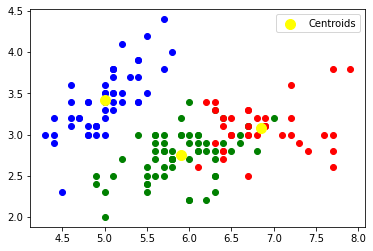

In [157]:
for i in range (0,len(x)):
    plt.scatter(x[i,0],x[i,1],color=colormap[y_means[i]])

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

Here blue represents Iris-setosa and red represents Iris-virginica and green represents Iris-versicolor

# Now lets try predicting using the model

In [158]:
labels[km.predict([[5.1, 3.5, 1.4, 0.2]])[0]]

'Iris-virginica'

In [159]:
labels[km.predict([[5.9, 3. , 5.1, 1.8]])[0]]

'Iris-versicolor'

we have succesfully predicted the species 